<a href="https://colab.research.google.com/github/Ritesh-Sil/Food-Image-Classification---Using-CNN/blob/Master/Food_Image_Binary_class_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

In [2]:
#!wget means, download the file from the link and store into google colab folder directory
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-08-14 06:22:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   271MB/s    in 0.4s    

2022-08-14 06:22:10 (271 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
## Inspect the data

In [4]:
!ls pizza_steak

test  train


In [5]:
# !ls pizza_steak/train/steak/ 

In [6]:
import os

In [7]:
for filepath,dirname, filenames in os.walk('pizza_steak'):
  print(f'Under {filepath}  we have {len(filenames)} number of files')


Under pizza_steak  we have 0 number of files
Under pizza_steak/test  we have 0 number of files
Under pizza_steak/test/steak  we have 250 number of files
Under pizza_steak/test/pizza  we have 250 number of files
Under pizza_steak/train  we have 0 number of files
Under pizza_steak/train/steak  we have 750 number of files
Under pizza_steak/train/pizza  we have 750 number of files


In [8]:
 #Alternative way to find the number of images in the file

In [9]:
num_of_files_train = len(os.listdir('pizza_steak/train/steak'))
print(f'Number of files in train directory : {num_of_files_train}')

Number of files in train directory : 750


In [10]:
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train/')
class_names = np.array([str(item.name) for item in data_dir.glob('*')])

In [11]:
print(class_names)

['steak' 'pizza']


In [12]:
print(data_dir)

pizza_steak/train


In [13]:
for i in data_dir.glob('*'):
  print(i)

pizza_steak/train/steak
pizza_steak/train/pizza


In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

Using ```random.sample(list, number of items to be sampled)```, we can randomly sample the items

In [15]:
random.sample([1,2,4,5,6,7,8,9,0], 1)

[6]

In [16]:
random.sample([1,2,4,5,6,7,8,9,0], 2)

[8, 2]

In [17]:
# os.listdir('pizza_steak/train/steak')

In [18]:
random_img_file_name = random.sample(os.listdir('pizza_steak/train/steak'), 1)
random_img_file_name

['786409.jpg']

In [19]:
## This is how a computer visualizes the image
img_tensor = mpimg.imread(f'pizza_steak/train/steak/{random_img_file_name[0]}')

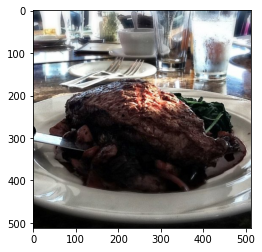

In [20]:
#How to show the image?
# Using the imshow from matplotlib

plt.imshow(img_tensor)

**Task #1** : *Write a function to pick an image randomly from the train folder.* 


1.   Show the class label in title of the image.
2.   Don't show the axis


In [21]:
!pwd

/content


In [22]:
!ls -lrt

total 106984
-rw-r--r-- 1 root root 109540975 Dec  6  2021 pizza_steak.zip
drwxr-xr-x 1 root root      4096 Aug  3 20:21 sample_data
drwxr-xr-x 4 root root      4096 Aug 14 06:22 pizza_steak


In [23]:
!ls pizza_steak

test  train


In [24]:
os.listdir('/content/pizza_steak/train')

['steak', 'pizza']

In [25]:
base_dir = '/content/pizza_steak/'
train_dir = 'train/'
test_dir = 'test/'
class_names = os.listdir('/content/pizza_steak/train')


def show_random_image(class_name, train_or_test_dir):
  full_path = base_dir+train_or_test_dir+class_name
  print(full_path)
  image_list = os.listdir(full_path)
  random_image  = random.sample(image_list, 1)
  random_img_tensor = mpimg.imread(full_path+'/'+random_image[0])
  plt.imshow(random_img_tensor)
  plt.title(train_or_test_dir+'::'+class_name+'::'+str(random_img_tensor.shape))
  plt.axis(False)
  

/content/pizza_steak/train/steak


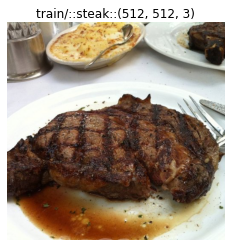

In [26]:
show_random_image(random.sample(class_names,1)[0],train_dir)

In [27]:
random.sample(class_names,1)

['pizza']

In [28]:
tensor = np.array([[[255,100,0],
           [255,100,0],
           [255,100,0]]])

In [29]:
tensor.shape

(1, 3, 3)

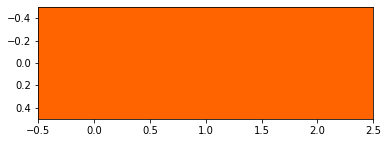

In [30]:
plt.imshow(tensor)

### **Image normalization**

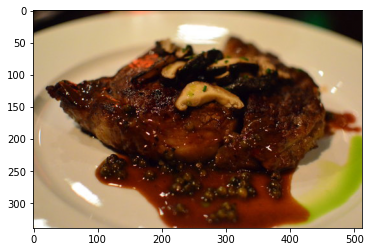

In [31]:
full_path = '/content/pizza_steak/train/steak/1846706.jpg'
img_norm = mpimg.imread(full_path)/255
plt.imshow(img_norm)

In [32]:
#End to End example



1.   Load the image
2.   Preprocess the image
3.   Build the CNN
4. Compile the CNN
5. Fit the training data into CNN



In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
#set the seed
tf.random.set_seed(42)

In [35]:
# Preprocessing the images : Scaling/Normalization

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
#Set up path to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

In [37]:
#import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode= 'binary',
                                               seed =42)


valid_data = valid_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size = (224,224),
                                               class_mode= 'binary',
                                               seed =42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [38]:
#Build the CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=32,
        activation='relu', 
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=32,
        activation='relu', 
        input_shape=(224,224,3)
    ),

    tf.keras.layers.MaxPool2D(
        pool_size=2,padding='valid'
    ),


    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=32,
        activation='relu'
    ),
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=32,
        activation='relu'
    ),

    tf.keras.layers.MaxPool2D(
      pool_size=2,padding='valid'
    ),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')




])

In [39]:
#complie --> Loss function , optimizer , metrics

model_1.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [40]:
#Fit the model

history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 56s 589ms/step - loss: 0.8108 - accuracy: 0.4827 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 283ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 13s 284ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 14s 297ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 13s 283ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000


In [45]:
import pandas as pd
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,0.810755,0.482667,0.693148,0.5
1,0.693163,0.494667,0.693147,0.5
2,0.693186,0.500000,0.693148,0.5
3,0.693161,0.500000,0.693148,0.5
4,0.693184,0.492000,0.693147,0.5


In [46]:
import joblib

joblib.dump(history_1,'history_1.pkl')

['history_1.pkl']

In [48]:
CNN_Model_1 = joblib.load('history_1.pkl')

In [49]:
CNN_Model_1.history

{'accuracy': [0.48266667127609253,
  0.4946666657924652,
  0.5,
  0.5,
  0.492000013589859],
 'loss': [0.8107545375823975,
  0.6931631565093994,
  0.6931859254837036,
  0.6931613683700562,
  0.6931836009025574],
 'val_accuracy': [0.5, 0.5, 0.5, 0.5, 0.5],
 'val_loss': [0.6931477785110474,
  0.6931473016738892,
  0.6931484937667847,
  0.6931475400924683,
  0.6931470632553101]}

In [51]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 193, 193, 10)      30730     
                                                                 
 conv2d_1 (Conv2D)           (None, 162, 162, 10)      102410    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 81, 81, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 10)        102410    
                                                                 
 conv2d_3 (Conv2D)           (None, 19, 19, 10)        102410    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 10)         0         
 2D)                                                    

In [53]:
# Set random seed

tf.random.set_seed(42)

In [54]:
train_data

In [55]:
# Create a model toreplicate the Tensorflow playground

model_2 = tf.keras.Sequential([
    
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')

]
)

In [56]:
model_2.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam() , metrics='accuracy')

In [57]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [58]:
history_2 = model_2.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 264ms/step - loss: 0.7406 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 274ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 262ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 262ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 13s 276ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
